# Time series analaysis with tensorflow 

__Time Series__ - data which is created over a period of time 
things to remember is how will you create a train, test and validation set for time series. 
- Splitting the traditional way (random shuffle of 70/15/15) can lead to incorrect splits.
- This is because, most of the time, you'll be wanting to use previous time series data to predict future time series data.

Two main __types__ of time series :
Univariate time series - time series of single entity 
Multivariate Time series -  time series of multiple entiites 

__Imputation__- you might also want to project back into the past to see how we got to where we are now or 
you might simply want to fill in holes in your data for what data doesn't already exist.

Application of machine learning in time series: 
1. Anomaly prediction — finding a sample which shouldn't have occurred in a series of other samples over time.
2. Forecasting — predicting future events based on past events.
3. Analyzing sequences to recognize what called them — predicting what word a soundwave produced based on the timesteps of the wave.

__Components__ of time series:
1. Trend: progession of time series 
2. Seasonality: repitative changes during a particular time period 
3. Autocorrelation: no trend or seasonality but they somewhat look like what  
4. Noise: the component which talks about uncertaininties happening due to some or other external component 

#### Types of time series based on the ocmponents(trend, seasonality, autocorrelatio and noise):
a. Non-stationary time series - 
trend, seasonality are visible upto a given period but then something happened and trend shifted the other way, and may leave the patterns which it previously followed 
- in such scenarios, more recent time stamps can be taken for having more acurate results instrad of considering the entire time series 

b. Stationary time series: 
behavious does not change over time. in this the more data you have will yield a better results 

In [169]:
import numpy as np 
import matplotlib.pyplot as plt 

In [170]:
def plot_Series (time, attribute, format='-'):
    plt.figure(figsize=(10,6))
    plt.plot(time, attribute, format)
    plt.xlabel('time')
    #plt.xticks(ticks=[365, 730, 1100, 1461], labels=[1,2,3,4])
    plt.ylabel('value')
    plt.grid("True")


In [171]:
def trend(time, slope =0):
    return slope*time 

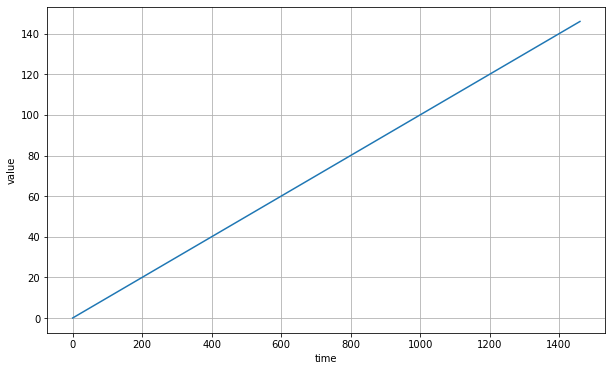

In [172]:
#making simple time series 
time = np.arange(4*365 + 1)
baseline = 10 
attribute = trend(time,0.1)
plot_Series(time, attribute)

In [173]:
#adding seasonal pattern 
def seasonal_pattern(season_time):
    return np.where (season_time < 0.4,
                    np.cos(season_time * 2*np.pi),
                    1/np.exp(3*season_time))
def seasonality (time, period, amplitude = 1 , phase = 0):
    season_time = ((time + phase) % period )/ period
    return amplitude * seasonal_pattern(season_time)
    

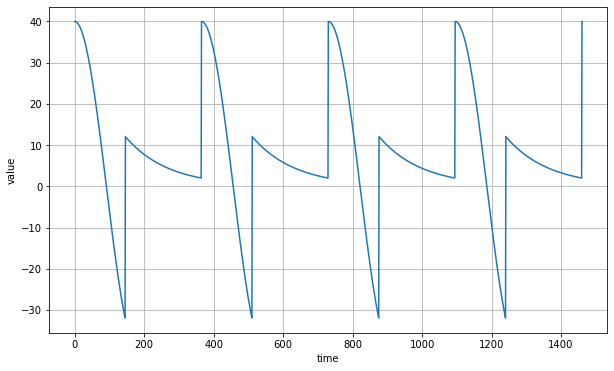

In [174]:
baseline = 10
amplitude = 40
series = seasonality(time , period =365 , amplitude = amplitude)
plot_Series(time , series)
plt.show()

In [175]:
series = seasonality(time , period =365 , amplitude = amplitude)
series

array([40.        , 39.99407357, 39.97629603, ...,  2.02448999,
        2.00791854, 40.        ])

In [176]:
np.shape(series)

(1461,)

In [177]:
365 * 4

1460

In [178]:
np.arange(4*365 + 1)

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [179]:
phase = 0
period = 365
season_time = ((time + phase) % period )/ period
season_time

array([0.        , 0.00273973, 0.00547945, ..., 0.99452055, 0.99726027,
       0.        ])

In [180]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [181]:
((time[130] + 0) % 365) / 365

0.3561643835616438

In [182]:
np.cos(0.3561643835616438 * 2*np.pi) *40

-24.74685613050012

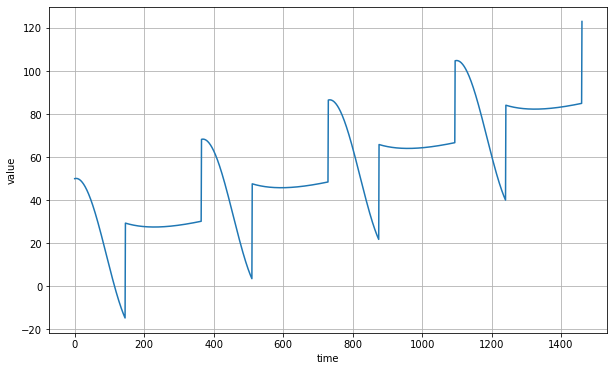

In [183]:
slope = 0.05 
series = baseline + trend(time, slope) + seasonality(time , period = 365, amplitude=amplitude)
plot_Series(time , series)
plt.show()

In [184]:
def noise(time, noise_level = 1, seed = None ):
    rnd = np.random.RandomState(seed)
    return rnd.rand(len(time))* noise_level

In [185]:
len(np.arange(4*365 + 1))

1461

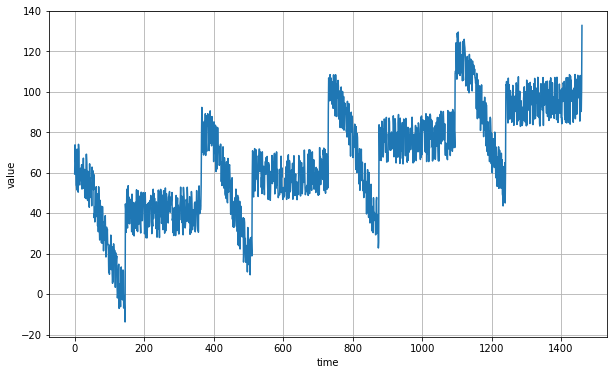

In [186]:
noise_level = 25
noisy_series = series + noise(time, noise_level , seed =42 )
plot_Series(time, noisy_series)
plt.show()

In [190]:
#adding autocorrelation 
def autocorrelation(time , amplitude , seed =None):
    rnd = np.random.RandomState(seed)
    a1 = 0.5 
    a2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar [:50] = 100
    for step in range(50 , len(time) + 50):
        ar[step] += a1 * ar[step-50]
        ar[step] += a2 * ar[step-33]
    return ar[50:] * amplitude

In [194]:
def autocorrelation(time , amplitude, seed = None):
    rnd = np.random.RandomState(seed)
    a = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1 , len(time) + 1):
        ar[step] += a * ar[step-1]
    
    return ar[1:]*amplitude 

<Figure size 432x288 with 0 Axes>

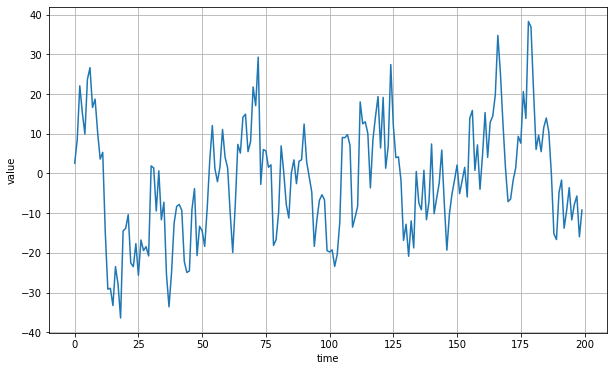

In [195]:
plt.figure()
series = autocorrelation(time , 10 ,seed = 42)
plot_Series(time[:200], series[:200])
plt.show()

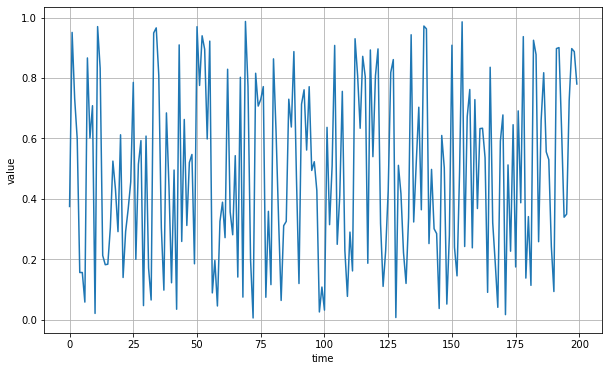

In [196]:
#again add noise 
series =noise(time, seed =42)
plot_Series(time[:200], series[:200])
plt.show()

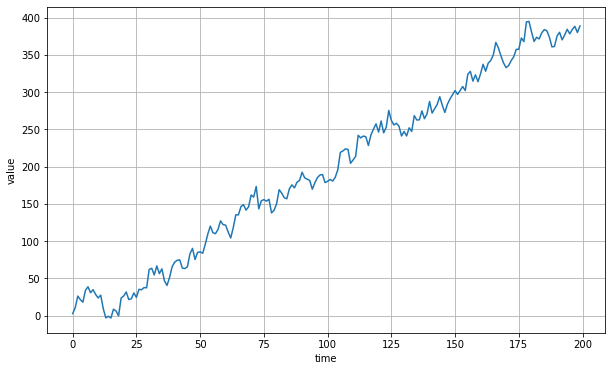

In [197]:
#then try another autocorrelation 
series = autocorrelation(time, 10, seed =42) + trend(time, 2)
plot_Series(time[:200], series[:200])
plt.show()

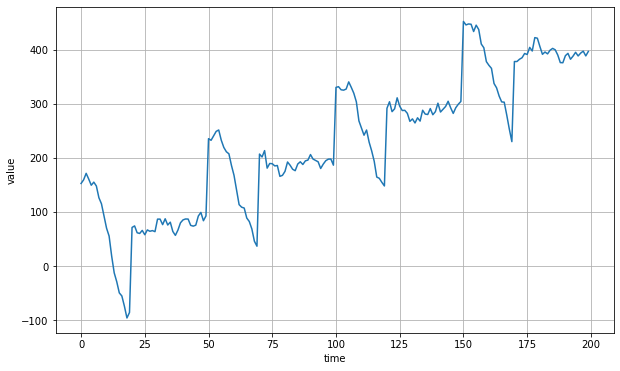

In [198]:
series =autocorrelation(time, 10, seed =42) + seasonality(time , period = 50 , amplitude=150)+trend(time, 2)
plot_Series(time[:200], series[:200])
plt.show()

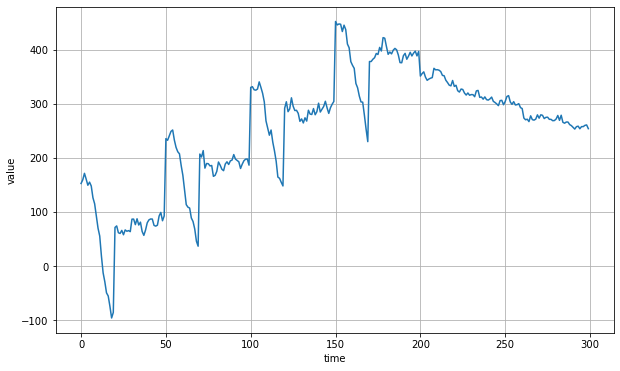

In [199]:
#let's make a non-stationary time series
series = autocorrelation(time , 10, seed =42)+seasonality(time , period = 50 , amplitude=150)+trend(time, 2)
series2 = autocorrelation(time , 5, seed =42)+seasonality(time , period = 50 , amplitude=2)+trend(time, -1) + 550
series[200:] =series2[200:]
plot_Series(time[:300], series[:300])
plt.show()

In [202]:
# adding impulses 
def impulses(time, num_impulses, amplitude =1, seed =None):
    rnd = np.random.RandomState(seed)
    impulses_indices = rnd.randint(len(time), size =10)
    series = np.zeros(len (time))
    for index in impulses_indices:
        series[index] += rnd.rand()*amplitude
    return series
    

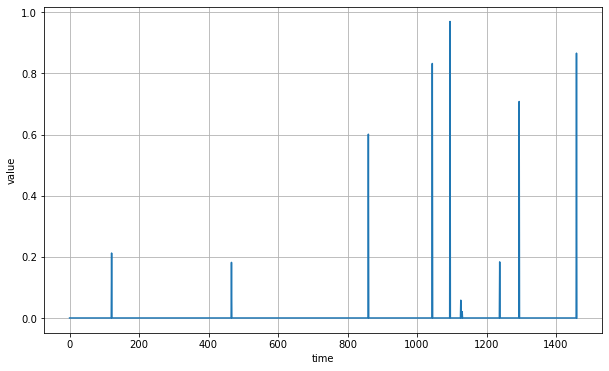

In [203]:
series = impulses(time, 10, seed =42)
plot_Series(time, series)
plt.show()

when I start adding some autocorrelations to this, then we'll see some of the behavior that we had discussed earlier where from our pulse we have a decay away from it but the decay could be interrupted by another pulse. This decay could be autocorrelated so that after the pulse it decays but then the decay autocorrelates. So we have these decreasing curves.

In [206]:
def autocorrelation(source, at):
    ar = source.copy()
    max_lag = len(at)
    for step, val in enumerate(source):
        for lag, a in at.items():
            if step - lag >0:
                ar[step] += a * ar[step-lag]
    
    return ar

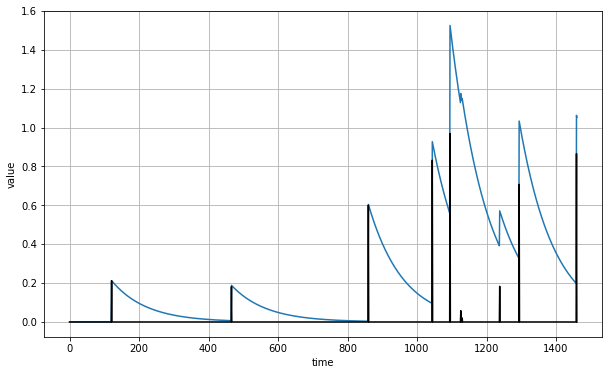

In [208]:
signal = impulses(time, 10 , seed =42)
series = autocorrelation(signal , {1:0.99})
plot_Series(time, series)
plt.plot(time, signal, "k-")
plt.show()

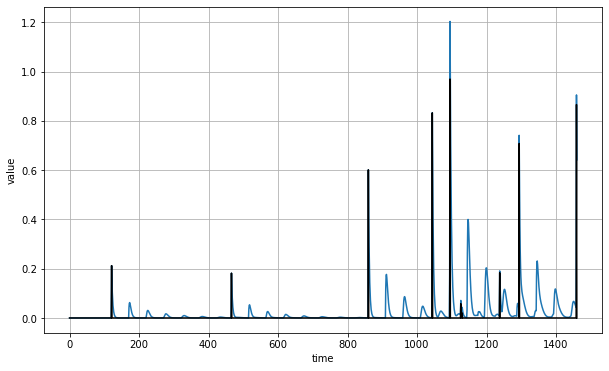

In [209]:
signal = impulses(time, 10 , seed =42)
series = autocorrelation(signal , {1:0.70, 50:0.20})
plot_Series(time, series)
plt.plot(time, signal, "k-")
plt.show()

- 🔑 If you're forecasting on time series data, you'll want to split your data into a training period (the first 70% of time steps), a validation period (the next 15% of the time steps) and a testing period (the final 15% of the time steps).

##### Fixed partitioning:

- You can then use these splits to train on past data and predict on new (the test set will be new to the model) data and then compare how your model's predictions compared to the actual events in the test data.
    - split data in a way such that equal proportions of seasons/time periods are included in train, test and validation set 
    
##### Roll forward partitioning: 
- Another option for creating train, valid and test splits for time series data is to use roll-forward partitioning. This involves:
    - Start training on the earliest data, gradually increasing as needed.
    - Your validation data are the most recent examples, where as, your test period are the timestamps happening now and into the future.
    - This means your model gets evaluating on a rolling basis as new data flows in.


Metrics to measure perforamce of forecasting models: 
- `errors = forecasts - actual`
- `mse = np.square(errors).mean()`
   - Squaring errors gets rid of negative errors.
- `rmse = np.sqrt(mse)`
   - Taking the square root gets the MSE into the same scale as your data.
- `mae = np.abs(errors).mean()`
- `mape = np.abs(errors/x_valid).mean()`
   - This gives an idea of the size of the error compared to the size of the values.
#### If large errors are worse than smaller errors, choose MSE but if your errors (large or small) are all the same, choose MAE.

Naive forecast:  take the last value and assume that the next value will be the same one, and this is called naive forecasting. 
Moving average: It involves taking a box of values (for example the pat 30 days) and using the mean of these values as the next time step prediction. This eliminates a lot of noise but does not include trend or seasonality.
#### moving average can be worse than the naive forecast becasue it does not considers the seasonality and noise components of time series

To avoid this, we have something called as 
Differencing
- remove trend and seasonality from time series 
- we study the difference between the value at time T and the value at an earlier period.
- apply moving average to this 
- add back the value at time T minus 365
- remove the past noise using a moving average on that

Start with a simple way to predict a time series, such as, moving average windows and differencing then see if machine learning can beat it.

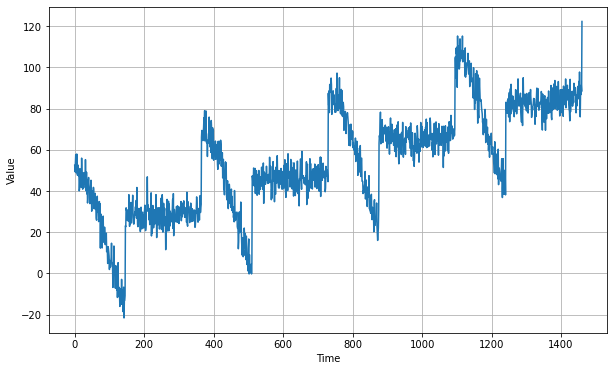

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

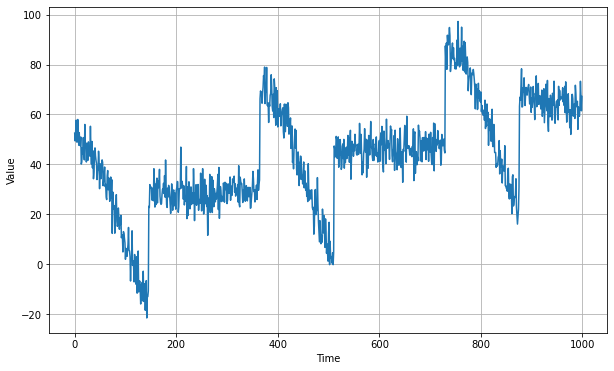

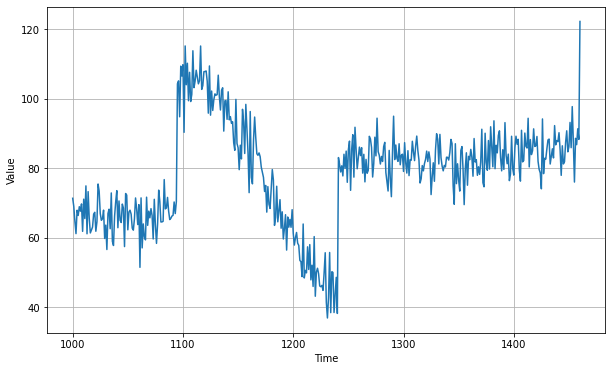

In [211]:
#splitting 
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

## Naive Forecast 

In [212]:
naive_forecast = series[split_time - 1:-1]

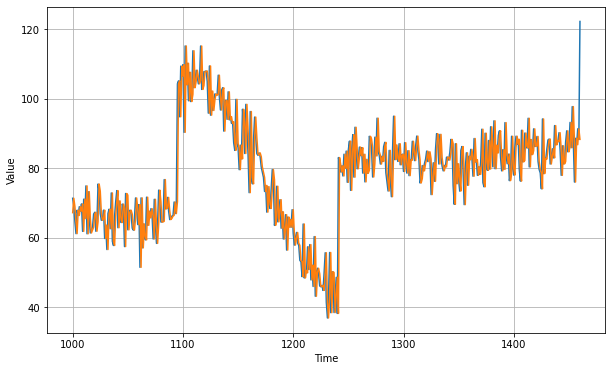

In [213]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

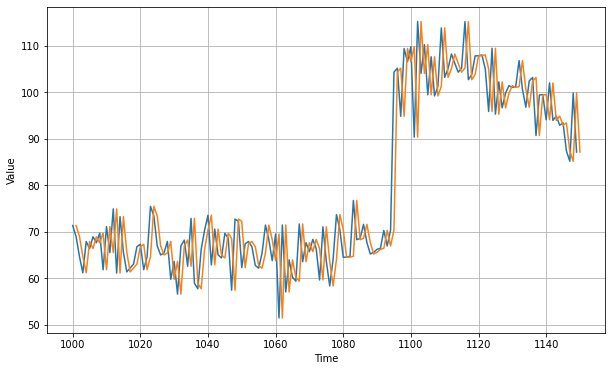

In [214]:
#zooming in 
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

You can see that the naive forecast lags 1 step behind the time series.

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:



In [215]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937908


## Now Lets try Moving Average

In [217]:
def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.If window_size=1, then this is equivalent to naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

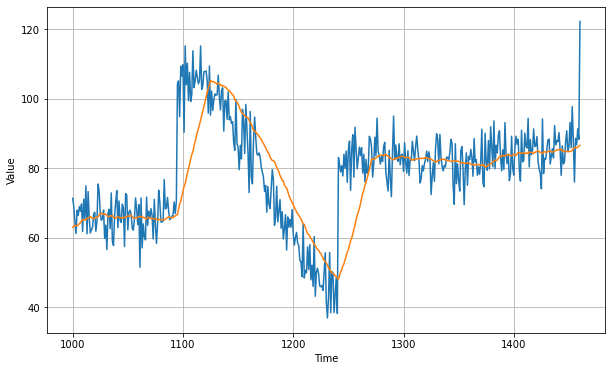

In [218]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [219]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


That's worse than naive forecast! The moving average does not anticipate trend or seasonality, so let's try to remove them by using differencing. Since the seasonality period is 365 days, we will subtract the value at time t – 365 from the value at time t.


## Apply differencing 

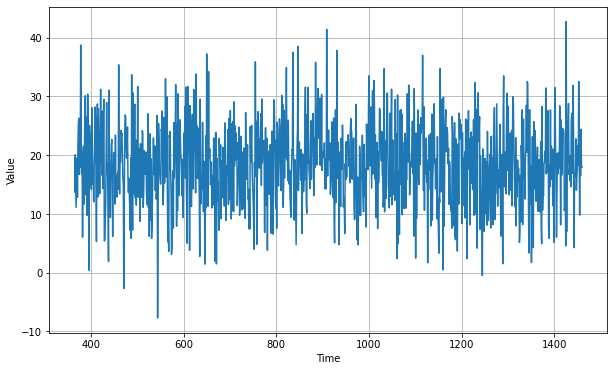

In [220]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

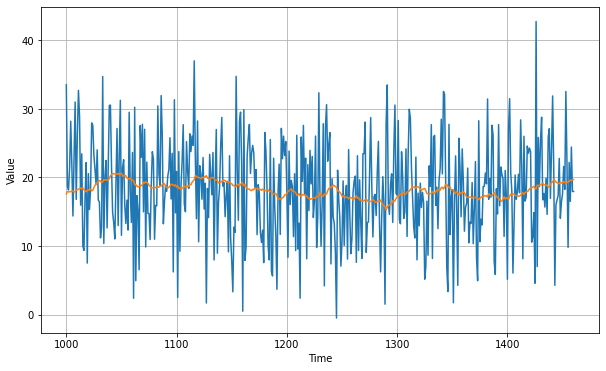

In [221]:
#Great, the trend and seasonality seem to be gone, so now we can use the moving average:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

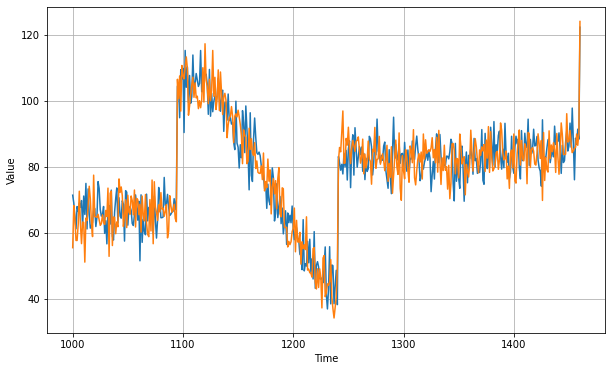

In [222]:
#Now let's bring back the trend and seasonality by adding the past values from t – 365:

diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [223]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

52.973663
5.839311


Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

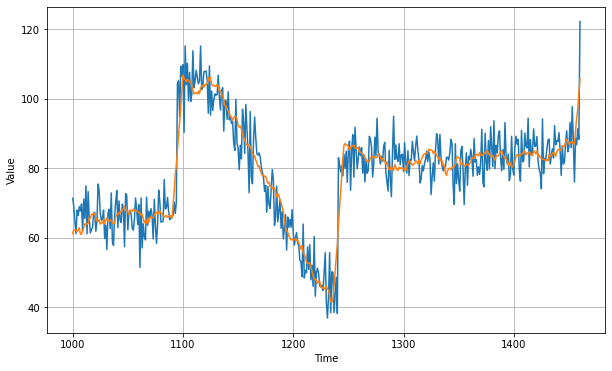

In [224]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [225]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

33.452263
4.569442
